<center><h1 style="color: orange"><b>Datathon - Zeroing Methane Emissions</b></h1></center>

This is the *starter notebook* for the [Zeroing Methane Emissions](https://www.speuntapped.com/) Datathon by SPE and Untapped Energy.

Here, we will unzip the images, load them to the notebook, and do initial visualizations.

First, importing some libraies:

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Utilities
from zipfile import ZipFile                         # To unzip files
import os
import glob
from random import *
import random
import warnings
warnings.filterwarnings('ignore')

from mrcnn import utils

# Computer vision
import cv2                                          # conda install opencv

# Display images using OpenCV (if using Google Colab)
# from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images
from scipy.signal import medfilt2d

First, unzip all the files to the disk:

In [2]:
# # specifying the zip files names
# file_names = ["ch4_plume_permian_2019_png Jeremy Zhao.zip", 
#               "ch4_plume_july_2020_to_may_2022_png Jeremy Zhao.zip",
#               "dummy_data Jeremy Zhao.zip",
#               "dummy_data_permian Jeremy Zhao.zip"]

# # Looping throught all zip files:
# for file_name in file_names:

#     print(f"Extracting files from {file_name}...\n")
    
#     # opening the zip file in READ mode
#     with ZipFile(file_name, 'r') as zip:
        
#         # printing all the contents of the zip file
#         # zip.printdir()
  
#         # extracting all the files
#         print('Extracting all the files now...')
#         zip.extractall()
#         print('Done!')

Each zipfile was unziped to a different folder. We can import the images using **OpenCV**.

In [3]:
# CH 4 Plume Permian 2019
# Only getting files with extension .png
plume_permian_2019_list = glob.glob("./permian_2019_png/*.png")
print(f"There are {len(plume_permian_2019_list)} png files.\n")

# CH 4 RGB Geotiffs July 2020 to may 2022 png
# Only getting files with extension .png
plume_2020_2022_list = glob.glob("./ch4_rgb_geotiffs_july_2020_to_may_2022_png/*.png")
print(f"There are {len(plume_2020_2022_list)} png files.\n")

# Dummy Data Permian
# Only getting files with extension .png
dummy_permian_list = glob.glob("./dummy_data_permian/*.png")
print(f"There are {len(dummy_permian_list)} png files.\n")

# Dummy Data
# Only getting files with extension .png
dummy_list = glob.glob("./dummy_data/*.png")
print(f"There are {len(dummy_list)} png files.\n")

There are 3763 png files.

There are 3059 png files.

There are 5051 png files.

There are 4695 png files.



Loading the images to the notebook:

In [4]:
# Plume Permian
plume_permian_images = np.array([np.array(cv2.imread(p), dtype=np.uint8) for p in plume_permian_2019_list])
print("Plume Permian shape:", plume_permian_images.shape)

# Plume
plume_images = np.array([np.array(cv2.imread(p), dtype=np.uint8) for p in plume_2020_2022_list])
print("Plume shape:", plume_images.shape)

# # Dummy Permian
# dummy_permian_images = np.array([np.array(cv2.imread(p), dtype=np.uint8) for p in dummy_permian_list])
# print("Dummy Permian shape:", dummy_permian_images.shape)

# # Dummy
# dummy_images = np.array([np.array(cv2.imread(p), dtype=np.uint8) for p in dummy_list])
# print("Dummy shape:", dummy_images.shape)


Plume Permian shape: (3763, 217, 217, 3)
Plume shape: (3059, 217, 217, 3)


All the images have a shape of 217x217 pixels and 3 color channels (RGB). Let's visualize some of them:

In [5]:
# Using OpenCV (it will open in another window)
# If you are using the cv2_imshow in Google Colab,
# the image will be shown inline
cv2.imshow("image", plume_permian_images[0])
cv2.waitKey(0)              # Press any key to close the window. DO NOT CLOSE THE WINDOW!
cv2.destroyAllWindows();

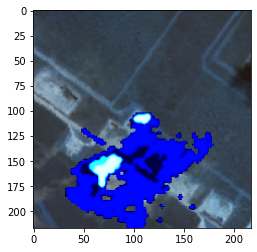

In [6]:
# Using matplotlib
plt.imshow(plume_permian_images[0]);

With OpenCV, the plume is red, while with matplotlib it is blue. It happens because the images were not read as RGB, but as BGR, so we need to convert them:

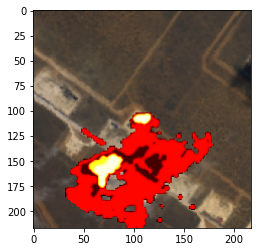

In [7]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(plume_permian_images)):
  plume_permian_images[i] = cv2.cvtColor(plume_permian_images[i], cv2.COLOR_BGR2RGB)

plt.imshow(plume_permian_images[0]);

Now it is fixed. Let's do this for all the other images:

In [8]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(plume_images)):
  plume_images[i] = cv2.cvtColor(plume_images[i], cv2.COLOR_BGR2RGB)

# for i in range(len(dummy_permian_images)):
#   dummy_permian_images[i] = cv2.cvtColor(dummy_permian_images[i], cv2.COLOR_BGR2RGB)

# for i in range(len(dummy_images)):
#   dummy_images[i] = cv2.cvtColor(dummy_images[i], cv2.COLOR_BGR2RGB)

Resizing the image, if desired:

In [9]:
def resizeImage(img, size = 128):
    """
    `resizeImage` resize an image to a squared one
    with size x size shape

    Parameters:

        img -> images array

        size -> output size. Default = 128

    Returns:

        imgR -> resized images
    """

    # Creating an empty array of images
    imgR = np.zeros((img.shape[0],size,size, 3))

    # Looping through all the images
    for i in range(img.shape[0]):

        # Resizing images 
        imgR[i] = cv2.resize(img[i], (size,size), interpolation=cv2.INTER_LINEAR)
    
    # Making sure the number are integers (for the plt.imshow)
    imgR = imgR.astype(int)
    
    return(imgR)

In [10]:
plume_permian_images = resizeImage(plume_permian_images)
print(plume_permian_images.shape)

plume_images = resizeImage(plume_images)
print(plume_images.shape)

# dummy_permian_images = resizeImage(dummy_permian_images)
# print(dummy_permian_images.shape)

# dummy_images = resizeImage(dummy_images)
# print(dummy_images.shape)

(3763, 128, 128, 3)
(3059, 128, 128, 3)


In [11]:
plume_images.max()

255

Creating a function to randomly plot several images at once:

In [12]:
def plotImages(data, k = 8, figsize = (13, 13)):
    """
    `plotImages` plot kxk images from the
    provided data.

    Parameters:
    
        data -> numpy array containing the images.

        k -> number of rows and columns to subplot.
             Default = 8
        
        figsize -> size of the figure.
                   Default = (15, 15)
    
    Returns:

        fig -> Image with the subplots.
    """

    # Creating subplots
    fig, ax = plt.subplots(nrows = k, ncols = k, figsize = figsize)
    for i in range(k):
        for j in range(k):

            # Randomly selecting one image
            ind = randint(0,data.shape[0]-1)

            # Ploting the image to a subplot
            ax[i,j].imshow(data[ind])

            # Turning axis off
            ax[i,j].set_axis_off()
            
    fig.tight_layout()
    plt.show();


In [13]:
# plotImages(plume_permian_images)

In [14]:
# plotImages(plume_images)

In [15]:
# plotImages(dummy_permian_images)

In [16]:
# plotImages(dummy_images)

In [17]:
def read_image(image_filename):
    return cv2.imread(image_filename, cv2.IMREAD_GRAYSCALE) 

In [18]:
# fil = plume_2020_2022_list[0]
fil = r"C:\Users\Owner\Desktop\methane_enemy\ch4_rgb_geotiffs_july_2020_to_may_2022_png/ang20200708t192518-3_r1823_c108-plume.png"
film = r"C:\Users\Owner\Desktop\methane_enemy\ch4_rgb_geotiffs_july_2020_to_may_2022_png/ang20200708t192518-3_r1823_c108-plume.png"

img = read_image(fil)
img = (img / np.max(img)) * 255
# img = img[:,:,0]
mask = read_image(film)

print(img.shape)
# Display the image in a window
cv2.imshow('Image', img)
cv2.imshow('Mask', mask)
cv2.waitKey(0)
cv2.destroyAllWindows()


(217, 217)


# Data Augmentation

The first augmentation is to create an image with the cumulative sums in four directions and average them.

0.0


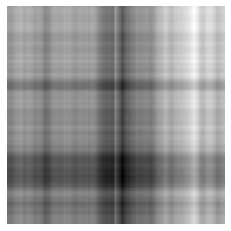

In [19]:
test = np.cumsum(img, axis = 0) + np.cumsum(img, axis = 1) + np.flipud(np.cumsum(np.flipud(img), axis = 0)) + np.fliplr(np.cumsum(np.fliplr(img), axis = 1))

img_c = test/np.max(test)
img_c = (img_c - np.min(img_c))
img_c = (img_c / np.max(img_c)) * 255

print(np.min(img_c))
plt.imshow(img_c, cmap = "gray")
plt.axis('off')
plt.show()

The second augmentation is to apply a 2D median filter to the image.

250.9683794466403


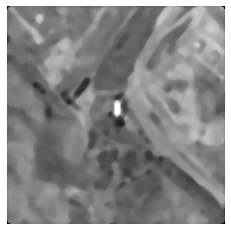

In [20]:
img_m = medfilt2d(img, 7)

print(np.max(img_m))

plt.imshow(img_m, cmap = "gray")
plt.axis('off')
plt.show()

# Augmentation as color channel

Now, let's include each augmentation as a color channel to the grayscale image.

In [21]:
img.shape

(217, 217)

In [22]:
img_rgb = np.expand_dims(img, axis = 2)
img_m2 = np.expand_dims(img_m, axis = 2)
img_c2 = np.expand_dims(img_c, axis = 2)

In [23]:
img_rgb.shape

(217, 217, 1)

In [24]:
img_rgb = np.concatenate((img_rgb, img_m2, img_c2), axis = 2)

img_rgb.shape

(217, 217, 3)

In [25]:
# cv2.imshow('Image',img_rgb)

# Modeling what we have

In [26]:
images_array = plume_permian_images

# Create an instance segmentation dataset using the images
class_names = ["BG"]
for i in range(1, 101):  # Replace 101 with the number of classes in your dataset
    class_names.append("class{}".format(i))

# Create a random mask for each image
masks = []
for i in range(len(images_array)):
    mask = np.zeros((images_array[i].shape[0], images_array[i].shape[1]), dtype=np.uint8)
    for j in range(1, 101):  # Replace 101 with the number of instances per image
        x1 = random.randint(0, images_array[i].shape[1] // 2)
        y1 = random.randint(0, images_array[i].shape[0] // 2)
        x2 = random.randint(images_array[i].shape[1] // 2, images_array[i].shape[1])
        y2 = random.randint(images_array[i].shape[0] // 2, images_array[i].shape[0])
        cv2.rectangle(mask, (x1, y1), (x2, y2), j, -1)
    masks.append(mask)

# Convert the list of masks to a numpy array
masks_array = np.array(masks)

# Create a Mask RCNN dataset object
class UnsupervisedDataset(utils.Dataset):
    def load_dataset(self, images_array, masks_array):
        for i in range(len(class_names)):
            self.add_class("dataset", i, class_names[i])
        for i in range(len(images_array)):
            self.add_image("dataset", image_id=i, path=None, width=images_array[i].shape[1], height=images_array[i].shape[0], mask=masks_array[i])

# Create the dataset object and load the dataset
dataset_train = UnsupervisedDataset()
dataset_train.load_dataset(images_array, masks_array)
dataset_train.prepare()

In [27]:
# from mrcnn.config import Config
# from mrcnn import model as modellib
# from mrcnn import visualize
# import cv2
# import colorsys
# import argparse
# import imutils
# import random
# import tensorflow as tf

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
# Generate random colors for each class label.

# Now we create a configuration that defines some properties of the model that is to be loaded in the next step.

# Feel free to increase the value of the variable IMAGES_PER_GPU if your GPU can handle it otherwise(in case of CPU) keep it 1.

# class SimpleConfig(Config):
#     # give the configuration a recognizable name
#     NAME = "coco_inference"
#     # set the number of GPUs to use along with the number of images
#     # per GPU
#     GPU_COUNT = 1
#     IMAGES_PER_GPU = 1
#     # number of classes on COCO dataset
#     NUM_CLASSES = 81

In [30]:
# # try

# # Split the dataset into training and validation sets
# train_images, val_images = train_test_split(plume_permian_images, test_size=0.2, random_state=42)

# # Normalize the pixel values to the range [0, 1]
# train_images = train_images / 255.0
# val_images = val_images / 255.0

# # Create masks for the images
# train_masks = np.zeros((train_images.shape[0], train_images.shape[1], train_images.shape[2], 1))
# val_masks = np.zeros((val_images.shape[0], val_images.shape[1], val_images.shape[2], 1))

# # Specify the channels to use for instance segmentation
# channel_indices = [0] # use all three color channels

# # Create the masks by thresholding the color channels of the images
# for i in range(train_images.shape[0]):
#     mask = np.zeros((train_images.shape[1], train_images.shape[2], 1), dtype=np.uint8)
#     for channel_index in channel_indices:
#         channel = train_images[i,:,:,channel_index]
#         _, channel_mask = cv2.threshold(channel, thresh=0.8, maxval=1, type=cv2.THRESH_BINARY)
#         mask = np.maximum(mask, channel_mask.reshape((train_images.shape[1], train_images.shape[2], 1)))
#     train_masks[i,:,:,:] = mask

# for i in range(val_images.shape[0]):
#     mask = np.zeros((val_images.shape[1], val_images.shape[2], 1), dtype=np.uint8)
#     for channel_index in channel_indices:
#         channel = val_images[i,:,:,channel_index]
#         _, channel_mask = cv2.threshold(channel, thresh=0.8, maxval=1, type=cv2.THRESH_BINARY)
#         mask = np.maximum(mask, channel_mask.reshape((val_images.shape[1], val_images.shape[2], 1)))
#     val_masks[i,:,:,:] = mask

# # Print the shapes of the data arrays
# print("Training images shape:", train_images.shape)
# print("Training masks shape:", train_masks.shape)
# print("Validation images shape:", val_images.shape)
# print("Validation masks shape:", val_masks.shape)


In [31]:
# # Split the dataset into training and validation sets
# train_images, val_images = train_test_split(plume_permian_images, test_size=0.2, random_state=42)

# # Normalize the pixel values to the range [0, 1]
# train_images = train_images / 255.0
# val_images = val_images / 255.0

# # Create masks for the images
# train_masks = np.zeros((train_images.shape[0], train_images.shape[1], train_images.shape[2], 1))
# val_masks = np.zeros((val_images.shape[0], val_images.shape[1], val_images.shape[2], 1))

# # Specify the channel to use for instance segmentation
# channel_index = 0  # use the red channel

# # Create the masks by thresholding the red channel of the images
# for i in range(train_images.shape[0]):
#     mask = np.zeros((train_images.shape[1], train_images.shape[2], 1), dtype=np.uint8)
#     channel = train_images[i,:,:,channel_index]
#     _, channel_mask = cv2.threshold(channel, thresh=0.8, maxval=1, type=cv2.THRESH_BINARY)
#     mask = np.maximum(mask, channel_mask.reshape((train_images.shape[1], train_images.shape[2], 1)))
#     train_masks[i,:,:,:] = mask
    
# for i in range(val_images.shape[0]):
#     mask = np.zeros((val_images.shape[1], val_images.shape[2], 1), dtype=np.uint8)
#     channel = val_images[i,:,:,channel_index]
#     _, channel_mask = cv2.threshold(channel, thresh=0.8, maxval=1, type=cv2.THRESH_BINARY)
#     mask = np.maximum(mask, channel_mask.reshape((val_images.shape[1], val_images.shape[2], 1)))
#     val_masks[i,:,:,:] = mask

# # Print the shapes of the data arrays
# print("Training images shape:", train_images.shape)
# print("Training masks shape:", train_masks.shape)
# print("Validation images shape:", val_images.shape)
# print("Validation masks shape:", val_masks.shape)


In [32]:
# # # Split the dataset into training and validation sets
# # train_images, val_images = train_test_split(plume_permian_images, test_size=0.2, random_state=42)

# # # Normalize the pixel values to the range [0, 1]
# # train_images = train_images / 255.0
# # val_images = val_images / 255.0

# # # Create masks for the images
# # train_masks = np.zeros((train_images.shape[0], train_images.shape[1], train_images.shape[2], 1))
# # val_masks = np.zeros((val_images.shape[0], val_images.shape[1], val_images.shape[2], 1))

# # Specify the channel to use for instance segmentation
# channel_index = 0  # use the red channel

# # Create the masks by thresholding the red channel of the images
# for i in range(train_images.shape[0]):
#     mask = np.zeros((train_images.shape[1], train_images.shape[2], 1), dtype=np.uint8)
#     channel = train_images[i,:,:,channel_index]
#     channel = np.clip(channel*0.8, 0, 1)  # adjust saturation of red channel
#     _, channel_mask = cv2.threshold(channel, thresh=0.75, maxval=1, type=cv2.THRESH_BINARY)  # tweak threshold
#     mask = np.maximum(mask, channel_mask.reshape((train_images.shape[1], train_images.shape[2], 1)))
#     train_masks[i,:,:,:] = mask
    
# for i in range(val_images.shape[0]):
#     mask = np.zeros((val_images.shape[1], val_images.shape[2], 1), dtype=np.uint8)
#     channel = val_images[i,:,:,channel_index]
#     channel = np.clip(channel*0.8, 0, 1)  # adjust saturation of red channel
#     _, channel_mask = cv2.threshold(channel, thresh=0.75, maxval=1, type=cv2.THRESH_BINARY)  # tweak threshold
#     mask = np.maximum(mask, channel_mask.reshape((val_images.shape[1], val_images.shape[2], 1)))
#     val_masks[i,:,:,:] = mask
    
# # Print the shapes of the data arrays
# print("Training images shape:", train_images.shape)
# print("Training masks shape:", train_masks.shape)
# print("Validation images shape:", val_images.shape)
# print("Validation masks shape:", val_masks.shape)


In [122]:
# try

# Split the dataset into training and validation sets
train_images, val_images = train_test_split(plume_permian_images, test_size=0.2, random_state=42)

# Normalize the pixel values to the range [0, 1]
train_images = train_images / 255.0
val_images = val_images / 255.0

# Create masks for the images
train_masks = np.zeros((train_images.shape[0], train_images.shape[1], train_images.shape[2], 1))
val_masks = np.zeros((val_images.shape[0], val_images.shape[1], val_images.shape[2], 1))

# Specify the channels to use for instance segmentation
channel_indices = [1] # use all three color channels

# Create the masks by thresholding the color channels of the images
for i in range(train_images.shape[0]):
    mask = np.zeros((train_images.shape[1], train_images.shape[2], 1), dtype=np.uint8)
    for channel_index in channel_indices:
        channel = train_images[i,:,:,channel_index]
        _, channel_mask = cv2.threshold(channel, thresh=0.1, maxval=1, type=cv2.THRESH_BINARY)
        mask = np.maximum(mask, channel_mask.reshape((train_images.shape[1], train_images.shape[2], 1)))
    train_masks[i,:,:,:] = mask

for i in range(val_images.shape[0]):
    mask = np.zeros((val_images.shape[1], val_images.shape[2], 1), dtype=np.uint8)
    for channel_index in channel_indices:
        channel = val_images[i,:,:,channel_index]
        _, channel_mask = cv2.threshold(channel, thresh=0.1, maxval=1, type=cv2.THRESH_BINARY)
        mask = np.maximum(mask, channel_mask.reshape((val_images.shape[1], val_images.shape[2], 1)))
    val_masks[i,:,:,:] = mask

# Print the shapes of the data arrays
print("Training images shape:", train_images.shape)
print("Training masks shape:", train_masks.shape)
print("Validation images shape:", val_images.shape)
print("Validation masks shape:", val_masks.shape)


Training images shape: (3010, 128, 128, 3)
Training masks shape: (3010, 128, 128, 1)
Validation images shape: (753, 128, 128, 3)
Validation masks shape: (753, 128, 128, 1)


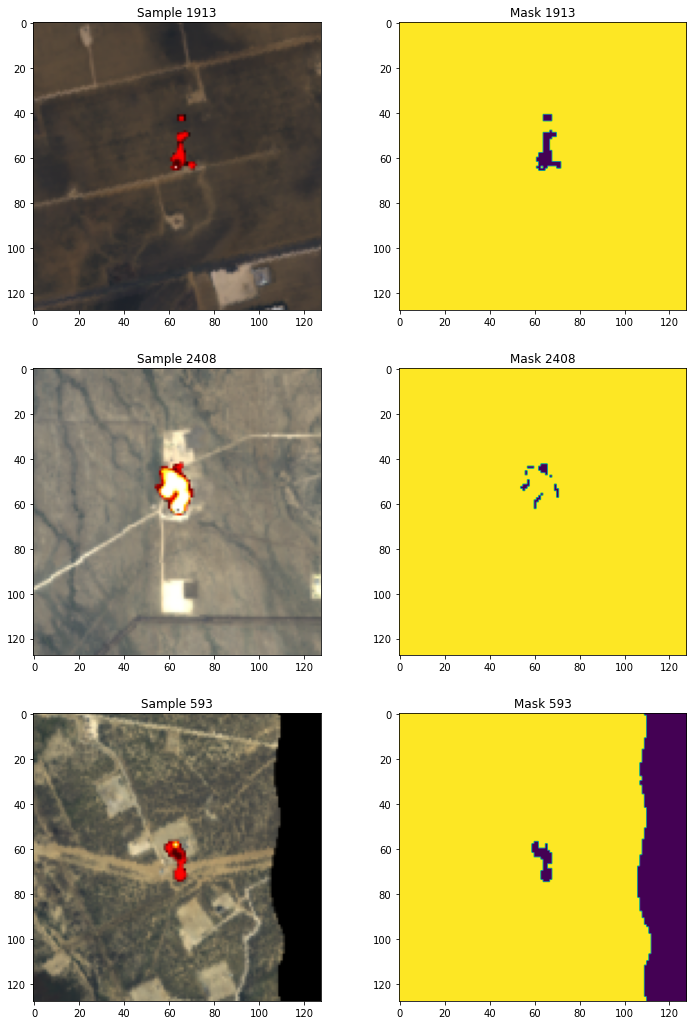

In [135]:
# Define the number of samples to show
num_samples = 3

# Select random samples from the training set
sample_indices = random.sample(range(len(train_images)), num_samples)

# Plot the samples
fig, axs = plt.subplots(nrows=num_samples, ncols=2, figsize=(12, 6*num_samples))
for i, index in enumerate(sample_indices):
    axs[i,0].imshow(train_images[index])
    axs[i,0].set_title(f"Sample {index}")
    axs[i,1].imshow(train_masks[index,:,:,0])
    axs[i,1].set_title(f"Mask {index}")
plt.show()

# _______________________________________________________________________________

In [136]:

# Create directories for saving images
train_images_dir = 'train_images'
train_masks_dir = 'train_masks'
val_images_dir = 'val_images'
val_masks_dir = 'val_masks'

os.makedirs(train_images_dir, exist_ok=True)
os.makedirs(train_masks_dir, exist_ok=True)
os.makedirs(val_images_dir, exist_ok=True)
os.makedirs(val_masks_dir, exist_ok=True)

# Save training images and masks
for i in range(train_images.shape[0]):
    image_path = os.path.join(train_images_dir, f'image_{i}.png')
    mask_path = os.path.join(train_masks_dir, f'mask_{i}.png')
    cv2.imwrite(image_path, train_images[i]*255) # scale the pixel values to [0, 255]
    cv2.imwrite(mask_path, train_masks[i]*255) # scale the pixel values to [0, 255]

# Save validation images and masks
for i in range(val_images.shape[0]):
    image_path = os.path.join(val_images_dir, f'image_{i}.png')
    mask_path = os.path.join(val_masks_dir, f'mask_{i}.png')
    cv2.imwrite(image_path, val_images[i]*255) # scale the pixel values to [0, 255]
    cv2.imwrite(mask_path, val_masks[i]*255) # scale the pixel values to [0, 255]


In [134]:
# Create directories for saving images
train_images_dir = 'train_images'
train_masks_dir = 'train_masks'
val_images_dir = 'val_images'
val_masks_dir = 'val_masks'

os.makedirs(train_images_dir, exist_ok=True)
os.makedirs(train_masks_dir, exist_ok=True)
os.makedirs(val_images_dir, exist_ok=True)
os.makedirs(val_masks_dir, exist_ok=True)

# Save training images and masks
for i in range(train_images.shape[0]):
    image_path = os.path.join(train_images_dir, f'image_{i}.png')
    mask_path = os.path.join(train_masks_dir, f'mask_{i}.png')
    train_image_rgb = train_images[i].astype(np.float32) / 255.0
    train_image_rgb = cv2.cvtColor(train_image_rgb, cv2.COLOR_BGR2RGB)
    cv2.imwrite(image_path, train_image_rgb*255) # convert BGR to RGB and scale pixel values to [0, 255]
    cv2.imwrite(mask_path, train_masks[i]*255) # scale the pixel values to [0, 255]

# Save validation images and masks
for i in range(val_images.shape[0]):
    image_path = os.path.join(val_images_dir, f'image_{i}.png')
    mask_path = os.path.join(val_masks_dir, f'mask_{i}.png')
    val_image_rgb = val_images[i].astype(np.float32) / 255.0
    val_image_rgb = cv2.cvtColor(val_image_rgb, cv2.COLOR_BGR2RGB)
    cv2.imwrite(image_path, val_image_rgb*255) # convert BGR to RGB and scale pixel values to [0, 255]
    cv2.imwrite(mask_path, val_masks[i]*255) # scale the pixel values to [0, 255]
